In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [25]:
train = pd.read_csv('../6.Data/Yann_Process_train.csv')
test = pd.read_csv('../6.Data/Yann_Process_test.csv')

target = 'target_is_fraud'
id_col = 'customer_id'

X = train.drop(columns=[target, id_col])
y = train[target]
X_test = test.drop(columns=[id_col])


In [26]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Répartition train avant oversampling : {y_train.value_counts().to_dict()}")

Répartition train avant oversampling : {0: 124061, 1: 3939}


In [27]:
rf = RandomForestClassifier(random_state=42,class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [1, 10]
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print('Best params:', grid.best_params_)


KeyboardInterrupt: 

In [ ]:
y_pred = best_model.predict(X_val)

print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

print('\nClassification Report:')
print(classification_report(y_val, y_pred))


Confusion Matrix:
[[27687  3328]
 [  736   249]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     31015
           1       0.07      0.25      0.11       985

    accuracy                           0.87     32000
   macro avg       0.52      0.57      0.52     32000
weighted avg       0.95      0.87      0.91     32000



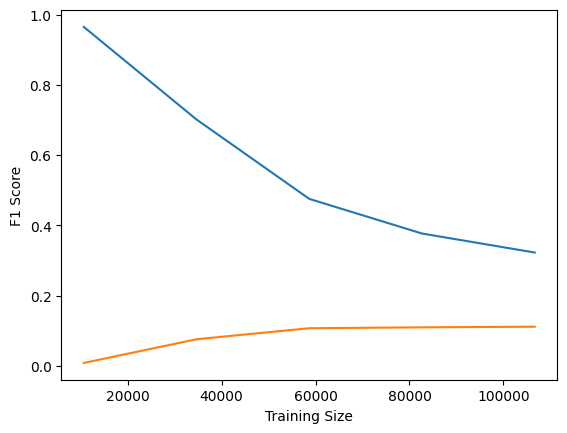

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=3, scoring='f1', n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1))
plt.plot(train_sizes, val_scores.mean(axis=1))
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.show()



In [ ]:
# Prédiction binaire 0/1 pour Kaggle
test_predictions = best_model.predict(X_test)

submission = pd.DataFrame({
    "customer_id": test["customer_id"],
    "target_is_fraud": test_predictions
})

submission.to_csv('../7.Submission/submission_rf_simple.csv', index=False)
print('Submission exportée.')


Submission exportée.


In [ ]:
test_df = pd.read_csv('../data/test.csv')